#### Adicionando os paths

In [1]:
import sys
sys.path.append('../')
sys.path.append('../Scripts/')

#### Importando bibliotecas

In [77]:
import pandas as pd
from Global_Variables import *
import Aux_Functions as af
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, \
                                  Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost.sklearn import  XGBClassifier
from collections import Counter
from numpy import mean, std
from sklearn.metrics import plot_confusion_matrix
import random
import matplotlib.pyplot as plt

In [3]:
atributos = pd.read_csv("../Outputs/Tabela_Atributos.csv", sep=";")

In [4]:
atributos

,Sequence,Genotype,Position,Codon,Drug,Codon_Resistente_01,Codon_Resistente_02,Codon_Resistente_03,Codon_Resistente_04,Codon_Resistente_05,...,Codon_Usage_09,Barreira_Genetica_10,Prevalencia_10,Codon_Usage_10,Barreira_Genetica_11,Prevalencia_11,Codon_Usage_11,Barreira_Genetica_12,Prevalencia_12,Codon_Usage_12
0,JX112598.1a.US.2009,1a,24,AAG,DCV,AGA,AGG,CGA,CGC,CGG,...,0,-1,0,0,-1,0,0,-1,0,0
1,JX112598.1a.US.2009,1a,24,AAG,LDV,AGA,AGG,CGA,CGC,CGG,...,0,-1,0,0,-1,0,0,-1,0,0
2,JX112598.1a.US.2009,1a,28,ATG,DCV,GTA,GTC,GTG,GTT,-,...,0,-1,0,0,-1,0,0,-1,0,0
3,JX112598.1a.US.2009,1a,28,ATG,OMV,GTA,GTC,GTG,GTT,-,...,0,-1,0,0,-1,0,0,-1,0,0
4,JX112598.1a.US.2009,1a,28,ATG,PIB,GTA,GTC,GTG,GTT,-,...,0,-1,0,0,-1,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,FJ958693.1a.US.2005,1a,93,TAC,EBR,CAC,CAT,-,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36986,FJ958693.1a.US.2005,1a,93,TAC,LDV,CAC,CAT,-,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36987,FJ958693.1a.US.2005,1a,93,TAC,OMV,CAC,CAT,-,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36988,FJ958693.1a.US.2005,1a,93,TAC,PIB,CAC,CAT,-,-,-,...,0,-1,0,0,-1,0,0,-1,0,0


#### Função para validar se determinada feature da sequência geraou não resistência

In [5]:
def validador(x):
    if 0 in list(x):
        return 1
    else:
        return 0

In [6]:
key_index = []
for i in range(0,len(atributos)):
    key_index.append("ID_"+str(i))

In [7]:
index = range(0, len(atributos))
atributos.insert(0, 'ID', key_index)
atributos

,ID,Sequence,Genotype,Position,Codon,Drug,Codon_Resistente_01,Codon_Resistente_02,Codon_Resistente_03,Codon_Resistente_04,...,Codon_Usage_09,Barreira_Genetica_10,Prevalencia_10,Codon_Usage_10,Barreira_Genetica_11,Prevalencia_11,Codon_Usage_11,Barreira_Genetica_12,Prevalencia_12,Codon_Usage_12
0,ID_0,JX112598.1a.US.2009,1a,24,AAG,DCV,AGA,AGG,CGA,CGC,...,0,-1,0,0,-1,0,0,-1,0,0
1,ID_1,JX112598.1a.US.2009,1a,24,AAG,LDV,AGA,AGG,CGA,CGC,...,0,-1,0,0,-1,0,0,-1,0,0
2,ID_2,JX112598.1a.US.2009,1a,28,ATG,DCV,GTA,GTC,GTG,GTT,...,0,-1,0,0,-1,0,0,-1,0,0
3,ID_3,JX112598.1a.US.2009,1a,28,ATG,OMV,GTA,GTC,GTG,GTT,...,0,-1,0,0,-1,0,0,-1,0,0
4,ID_4,JX112598.1a.US.2009,1a,28,ATG,PIB,GTA,GTC,GTG,GTT,...,0,-1,0,0,-1,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,ID_36985,FJ958693.1a.US.2005,1a,93,TAC,EBR,CAC,CAT,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36986,ID_36986,FJ958693.1a.US.2005,1a,93,TAC,LDV,CAC,CAT,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36987,ID_36987,FJ958693.1a.US.2005,1a,93,TAC,OMV,CAC,CAT,-,-,...,0,-1,0,0,-1,0,0,-1,0,0
36988,ID_36988,FJ958693.1a.US.2005,1a,93,TAC,PIB,CAC,CAT,-,-,...,0,-1,0,0,-1,0,0,-1,0,0


In [8]:
colunas = ['ID','Barreira_Genetica_01', 'Barreira_Genetica_02', 'Barreira_Genetica_03',
       'Barreira_Genetica_04', 'Barreira_Genetica_05', 'Barreira_Genetica_06',
       'Barreira_Genetica_07', 'Barreira_Genetica_08', 'Barreira_Genetica_09',
       'Barreira_Genetica_10', 'Barreira_Genetica_11', 'Barreira_Genetica_12']

In [9]:
df_inter = atributos.loc[:,colunas]

In [10]:
df_inter["Resultado"] = df_inter.apply(validador, axis=1)

In [11]:
df_inter["Resultado"].value_counts()

0    36434
1      556
Name: Resultado, dtype: int64

In [100]:
final_df = atributos.merge(df_inter[["ID","Resultado"]], left_on="ID", right_on="ID", how="left", copy=False)

In [101]:
final_df

,ID,Sequence,Genotype,Position,Codon,Drug,Codon_Resistente_01,Codon_Resistente_02,Codon_Resistente_03,Codon_Resistente_04,...,Barreira_Genetica_10,Prevalencia_10,Codon_Usage_10,Barreira_Genetica_11,Prevalencia_11,Codon_Usage_11,Barreira_Genetica_12,Prevalencia_12,Codon_Usage_12,Resultado
0,ID_0,JX112598.1a.US.2009,1a,24,AAG,DCV,AGA,AGG,CGA,CGC,...,-1,0,0,-1,0,0,-1,0,0,0
1,ID_1,JX112598.1a.US.2009,1a,24,AAG,LDV,AGA,AGG,CGA,CGC,...,-1,0,0,-1,0,0,-1,0,0,0
2,ID_2,JX112598.1a.US.2009,1a,28,ATG,DCV,GTA,GTC,GTG,GTT,...,-1,0,0,-1,0,0,-1,0,0,0
3,ID_3,JX112598.1a.US.2009,1a,28,ATG,OMV,GTA,GTC,GTG,GTT,...,-1,0,0,-1,0,0,-1,0,0,0
4,ID_4,JX112598.1a.US.2009,1a,28,ATG,PIB,GTA,GTC,GTG,GTT,...,-1,0,0,-1,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,ID_36985,FJ958693.1a.US.2005,1a,93,TAC,EBR,CAC,CAT,-,-,...,-1,0,0,-1,0,0,-1,0,0,0
36986,ID_36986,FJ958693.1a.US.2005,1a,93,TAC,LDV,CAC,CAT,-,-,...,-1,0,0,-1,0,0,-1,0,0,0
36987,ID_36987,FJ958693.1a.US.2005,1a,93,TAC,OMV,CAC,CAT,-,-,...,-1,0,0,-1,0,0,-1,0,0,0
36988,ID_36988,FJ958693.1a.US.2005,1a,93,TAC,PIB,CAC,CAT,-,-,...,-1,0,0,-1,0,0,-1,0,0,0


In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [113]:
sequence_list = final_df.Sequence.unique()
random.seed(42)
sequence_test = random.choices(sequence_list, k=411)
index_test = final_df.loc[final_df.Sequence.isin(sequence_test)].index

In [107]:
features_columns = ['Barreira_Genetica_01', 'Prevalencia_01', 'Codon_Usage_01',
       'Barreira_Genetica_02', 'Prevalencia_02', 'Codon_Usage_02',
       'Barreira_Genetica_03', 'Prevalencia_03', 'Codon_Usage_03',
       'Barreira_Genetica_04', 'Prevalencia_04', 'Codon_Usage_04',
       'Barreira_Genetica_05', 'Prevalencia_05', 'Codon_Usage_05',
       'Barreira_Genetica_06', 'Prevalencia_06', 'Codon_Usage_06',
       'Barreira_Genetica_07', 'Prevalencia_07', 'Codon_Usage_07',
       'Barreira_Genetica_08', 'Prevalencia_08', 'Codon_Usage_08',
       'Barreira_Genetica_09', 'Prevalencia_09', 'Codon_Usage_09',
       'Barreira_Genetica_10', 'Prevalencia_10', 'Codon_Usage_10',
       'Barreira_Genetica_11', 'Prevalencia_11', 'Codon_Usage_11',
       'Barreira_Genetica_12', 'Prevalencia_12', 'Codon_Usage_12']

In [108]:
X = final_df[features_columns].copy()

y = final_df[['Resultado']].copy()

In [109]:
len(index_test)

9585

In [114]:
X_train = X.loc[X.index.difference(index_test)]
X_test = X.loc[index_test]
y_train = y.loc[y.index.difference(index_test)]
y_test = y.loc[index_test]

In [18]:
# Feature Scaling
steps = [('scaler', MinMaxScaler())]
num_transformer = Pipeline(steps=steps)

# Compose preprocessor
transformers = [('num', num_transformer, features_columns)]
preprocessor = ColumnTransformer(transformers=transformers)

In [50]:
# calculate precision-recall area under curve
def pr_auc(y_true, predict_proba):
    # calculate precision-recall curve
    p, r,  = precision_recall_curve(y_true, predict_proba)
    # calculate area under curve
    return auc(r, p)


# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(pr_auc, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    return scores

In [54]:
def get_class_weights(y):

    y = y.Resultado.values

    # define number of classes
    counter = Counter(y)

    # define number of majority classes
    majority = max(counter.values())

    # create a dict with {class: }
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}



# Defined Models
def get_models():

    models = dict()

    # define first step preprocessor
    step_0 = ('preprocessor', preprocessor)

    # Define classifier

    # Random Forest - rf
    steps = [step_0, ('rf', RandomForestClassifier(n_jobs=-1, class_weight='balanced'))]
    models['Random Forest'] = Pipeline(steps=steps)


    # Xgboost - xgb
    steps = [step_0, ('xgb', XGBClassifier(tree_method='gpu_hist', 
                                           gpu_id=0, 
                                           class_weights=get_class_weights(y)))]

    models['Xgboost'] = Pipeline(steps=steps)


    return models

In [55]:
# Model Selection
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, \
                                    cross_val_score, cross_validate, \
                                    GridSearchCV
# Metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, \
                            SCORERS, precision_recall_curve, auc, make_scorer

In [56]:
%%time

results = list()
models = get_models()
# evalute each model
for model in models:
    print("-> Model %s" % (model))
    # evalute the model and store results
    scores = evaluate_model(X, y, models[model])
    results.append(scores)
    # summarize performance
    print("-> Mean PR AUC: %.3f (%.3f)" % (mean(scores), std(scores)))

-> Model Random Forest
-> Mean PR AUC: 1.000 (0.000)
-> Model Xgboost
-> Mean PR AUC: 1.000 (0.000)
Wall time: 26.7 s


C:\Users\Douglas\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[20:27:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




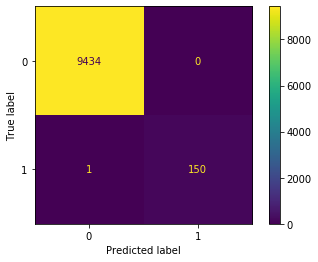

In [115]:
models['Xgboost'].fit(X_train, y_train)
plot_confusion_matrix(models['Xgboost'], X_test, y_test)
plt.show()

In [127]:
X_test["Resultado"] = models['Xgboost'].predict(X_test)

C:\Users\Douglas\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [133]:
patient_result = final_df.loc[index_test][["Sequence","Drug"]].merge(X_test[["Resultado"]], how="inner", left_index=True, right_index=True)

In [136]:
patient_result.loc[patient_result.Resultado==1]

,Sequence,Drug,Resultado
1679,JX112547.1a.US.2007,EBR,1
1680,JX112547.1a.US.2007,DCV,1
1681,JX112547.1a.US.2007,LDV,1
1682,JX112547.1a.US.2007,OMV,1
1684,JX112547.1a.US.2007,VEL,1
...,...,...,...
35285,HM042038.1a.TH.2006,LDV,1
35286,HM042038.1a.TH.2006,OMV,1
35287,HM042038.1a.TH.2006,PIB,1
35288,HM042038.1a.TH.2006,VEL,1
